# what is bias and variance 

## Bias and variance are two important concepts in machine learning that relate to the performance and generalization of a model.

# Bias:

## Bias refers to the error introduced by approximating a real-world problem with a simplified model. It captures the model's tendency to consistently deviate from the true relationship between the input variables and the target variable. A model with high bias oversimplifies the problem and may underfit the data. In such cases, the model fails to capture the underlying patterns and tends to have high training and test error. High bias can lead to poor predictive performance.

# Variance:

## Variance refers to the sensitivity of a model to small fluctuations in the training data. It measures the extent to which the model's predictions would vary if trained on different subsets of the training data. A model with high variance is overly complex and can capture noise or random fluctuations in the training data. It tends to memorize the training data instead of generalizing well to unseen data, leading to overfitting. High variance can result in low training error but high test error.

### In summary, bias and variance represent two aspects of model performance:

## Bias captures the model's tendency to underfit by oversimplifying the problem, leading to high error on both training and test data.

## Variance captures the model's tendency to overfit by being too sensitive to the training data, resulting in low error on the training data but high error on the test data.


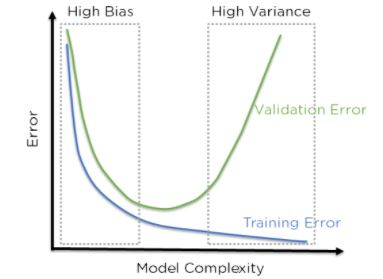

# What is Regularization in Machine Learning?

## Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.


                                                 

## Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it. 

# Regularization Techniques 
T
## There are two main types of regularization techniques: Ridge Regularization and Lasso Regularization.



                                                         

# Ridge Regularization : 

## Also known as Ridge Regression, it modifies the over-fitted or under fitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.

## This means that the mathematical function representing our machine learning model is minimized and coefficients are calculated. The magnitude of coefficients is squared and added. Ridge Regression performs regularization by shrinking the coefficients present. The function depicted below shows the cost function of ridge regression :



                                            

## In the cost function, the penalty term is represented by Lambda λ. By changing the values of the penalty function, we are controlling the penalty term. The higher the penalty, it reduces the magnitude of coefficients. It shrinks the parameters. Therefore, it is used to prevent multicollinearity, and it reduces the model complexity by coefficient shrinkage. 



Cost function = Loss + λ x∑‖w‖^2 

For Linear Regression line, let’s consider two points that are on the line,

Loss = 0 (considering the two points on the line)

λ= 1

w = 1.4

Then, Cost function = 0 + 1 x 1.42

            = 1.96

For Ridge Regression, let’s assume,

Loss = 0.32 + 0.22 = 0.13

λ = 1

w = 0.7

Then, Cost function = 0.13 + 1 x 0.72

            = 0.62

ridge.



In [40]:
from sklearn.datasets import load_diabetes

import numpy as  np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd 
import time

In [48]:
# Generate random data points
np.random.seed(0)
x = np.linspace(-5, 5, 100)
y = 2*x + 3 + np.random.normal(0, 5, 100)

In [49]:
X_train , X_test  , y_train , y_test = train_test_split(x , y , test_size = 0.2 ,random_state = 45)

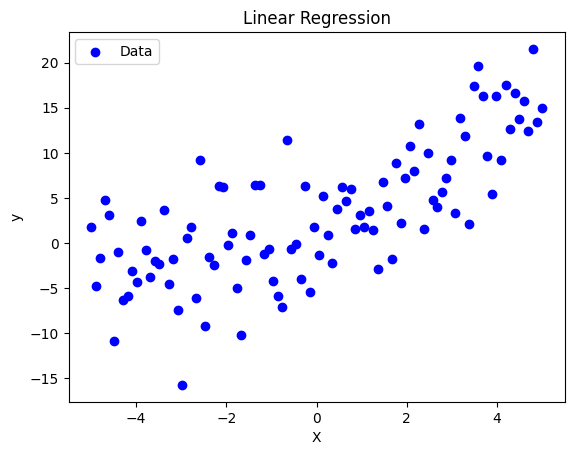

In [4]:
from sklearn.linear_model import LinearRegression

# Fit linear regression
linear_reg = LinearRegression()
linear_reg.fit(X.reshape(-1, 1), y)

# Predict using linear regression
y_linear_pred = linear_reg.predict(X.reshape(-1, 1))

# Plot the data and linear regression line
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [13]:
X,y = load_diabetes(return_X_y=True)

In [14]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [15]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 45)

In [16]:
reg = LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

In [17]:
print(reg.coef_)
print()
print(reg.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]

152.13623331746496


In [18]:
y_pred= reg.predict(X_test)
r2_score(y_test ,y_pred)

0.5188113124539249

In [164]:
from sklearn.linear_model import Ridge

In [167]:
r = Ridge(alpha=0.0001)

In [41]:
y_pred1 = r.predict(X_test)

In [42]:
r2_score(y_pred,y_test)


0.1599284464431484

## let code ridge regression from scratch for 2d data

In [65]:
# Generate random data points
np.random.seed(0)
x = np.linspace(-5, 5, 100)
y = 2*x + 3 + np.random.normal(0, 5, 100)
X_train , X_test  , y_train , y_test = train_test_split(x , y , test_size = 0.2 ,random_state = 45)

In [149]:
class Ridge:
    
    # Constructor to initialize the class with alpha parameter
    def __init__(self, alpha=0.1):
        self.alpha = alpha  # Regularization parameter
        self.m = None  # Slope of the line
        self.b = None  # Intercept of the line
        
    # Method to fit the linear regression model
    def fit(self, X_train, y_train):
        
        
        num = 0 
        dem  = 0 # Calculate the numerator and denominator for the slope calculation
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()) 
        
        # Calculate the slope (m) using the formula
        self.m = num / (den + self.alpha)
        
        # Calculate the intercept (b) using the formula
        self.b = y_train.mean() - (self.m * X_train.mean())
        
        # Print the slope and intercept for visualization
        print("Slope (m):", self.m)
        print("Intercept (b):", self.b)
            
    # Method to predict the target variable using the trained model
    def predict(self, X_test):
        return self.m * X_test + self.b

In [90]:
reg = ridge(alpha=10 )

In [91]:
reg.fit(X_train ,y_train)

1.9065529630231615 3.124380323083004


In [92]:
y_pred = reg.predict(X_test)

In [93]:
r2_score(y_pred , y_test)

0.4586076999006029

In [169]:
# MORE LAMBDA  BIAS INCREASSE AND VARIANCE DESCREASES 

# LESS LAMBDA  BIAS DESCREASES AND VARIANCE INCREASSE 


## When we use regularization in machine learning, such as in ridge regression or Lasso regression, the loss function is modified to include a regularization term. This regularization term is typically a penalty on the magnitude of the model's coefficients (weights), represented as λ||W||^2, where λ (or alpha, depending on the notation) is the regularization parameter and ||W||^2 represents the squared magnitude of the weights.


# The impact of increasing or decreasing the regularization parameter λ (or alpha) on the loss can be summarized as follows:

# Increasing Lambda/Alpha:

## As λ (or alpha) increases, the regularization term becomes more significant in the loss function.

## This encourages the model to prioritize smaller values for the weights to minimize the overall loss.

## Increasing λ (or alpha) can lead to higher bias and lower variance, as the model tends to become more constrained and simpler.

## It helps prevent overfitting by penalizing large weights, reducing the model's complexity and making it less likely to fit noise in the training data.

## However, excessively large λ (or alpha) values can result in underfitting, where the model is too constrained and fails to capture the underlying patterns in the data.

# Decreasing Lambda/Alpha:

## As λ (or alpha) decreases, the regularization term becomes less significant in the loss function.

## This allows the model to assign higher weights to the features, potentially increasing the model's complexity.

## Decreasing λ (or alpha) can lead to lower bias and higher variance, as the model becomes more flexible and prone to overfitting.

## It allows the model to fit the training data more closely and capture complex relationships, but it may also fit noise or idiosyncrasies in the data.

## However, excessively small λ (or alpha) values can lead to overfitting, where the model becomes too complex and fails to generalize well to new, unseen data.